# Data Exploration

Let's first have a descriptive exploration on our data.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(path)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [17]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


# Data Visualization

Next, we have a visualization of data and relationship between them.

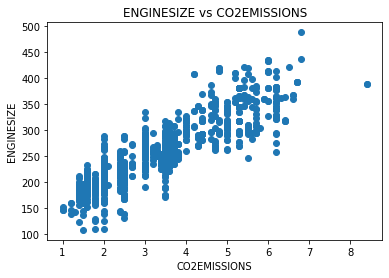

In [18]:
cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
plt.scatter(cdf[["ENGINESIZE"]],cdf[["CO2EMISSIONS"]])
plt.xlabel("CO2EMISSIONS")
plt.ylabel("ENGINESIZE")
plt.title("ENGINESIZE vs CO2EMISSIONS")
plt.show()

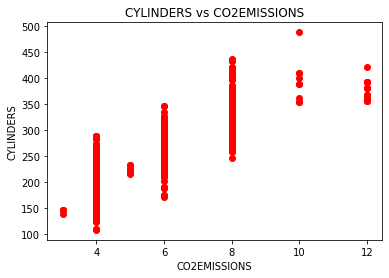

In [19]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='red')
plt.xlabel("CO2EMISSIONS")
plt.ylabel("CYLINDERS")
plt.title("CYLINDERS vs CO2EMISSIONS")
plt.show()

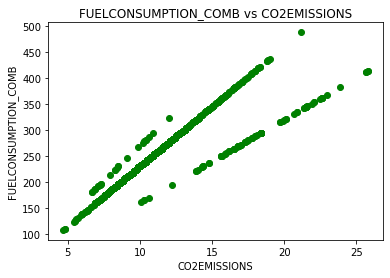

In [20]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='green')
plt.xlabel("CO2EMISSIONS")
plt.ylabel("FUELCONSUMPTION_COMB")
plt.title("FUELCONSUMPTION_COMB vs CO2EMISSIONS")
plt.show()

# Multiple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

# Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:

In [21]:
portion = np.random.rand(len(df)) < 0.8
train = cdf[portion]
test = cdf[~portion]

# Modeling

Using sklearn package to model data.

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x,train_y)
print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficients:  [[11.41930102  6.49714606 10.1684878 ]]
Intercept:  [62.93002844]


Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. 

# Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. 

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error
*   Mean Squared Error (MSE)
*   Root Mean Squared Error (RMSE)
*   R-squared

In [23]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ =regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2_square is", r2_score(test_y,test_y_))

Mean absolute error: 17.10
Residual sum of squares (MSE): 564.45
R2_square is 0.8495030681245734
